## LAB | EDA BIVARIATE

In [7]:
pip show kagglehub

Name: kagglehub
Version: 0.3.11
Summary: Access Kaggle resources anywhere
Home-page: https://github.com/Kaggle/kagglehub
Author: 
Author-email: Kaggle <support@kaggle.com>
License: Apache License
                           Version 2.0, January 2004
                        http://www.apache.org/licenses/

   TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

   1. Definitions.

      "License" shall mean the terms and conditions for use, reproduction,
      and distribution as defined by Sections 1 through 9 of this document.

      "Licensor" shall mean the copyright owner or entity authorized by
      the copyright owner that is granting the License.

      "Legal Entity" shall mean the union of the acting entity and all
      other entities that control, are controlled by, or are under common
      control with that entity. For the purposes of this definition,
      "control" means (i) the power, direct or indirect, to cause the
      direction or management of such entity

## Loading & Preparing the data

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import scipy.stats as st
from scipy.stats import chi2_contingency 
from scipy.stats.contingency import association 

import kagglehub
from kagglehub import KaggleDatasetAdapter

%matplotlib inline 
pd.set_option("display.max_columns", None)

In [13]:
# Set the path to the file
file_path = "amz_uk_price_prediction_dataset.csv"

# Load the latest version

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "asaniczka/uk-optimal-product-price-prediction",
  file_path,
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/var/folders/rx/4vz0nngn7_q84td2symm90y40000gn/T/ipykernel_25196/3013975043.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:    uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  


In [18]:
df.shape

(2443651, 9)

In [19]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    - Are there categories where being a best-seller is more prevalent? 
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [15]:
# Filtering out columns in the dataframe where more than 80% of the values are missing
df = df[df.columns[df.isnull().mean() < 0.8]]

Crosstab Analysis

In [22]:
df_best_sellers = pd.crosstab(df["category"], df["isBestSeller"]).sort_values(by=True, ascending=False)
df_best_sellers

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


### Statistical Test

In [24]:
# P-value for Chi-square 
_, chi_p, _, _ = chi2_contingency(df_best_sellers)
print(f"P-value of Chi-square test is: {chi_p}")

# Cramer's V
association(df_best_sellers, method="cramer")

P-value of Chi-square test is: 0.0


0.12228294397605641

### Visualization 

In [43]:
df_best_sellers.plot(kind="bar", stacked=True)

<Axes: xlabel='category'>

In [45]:
print(df.columns)

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


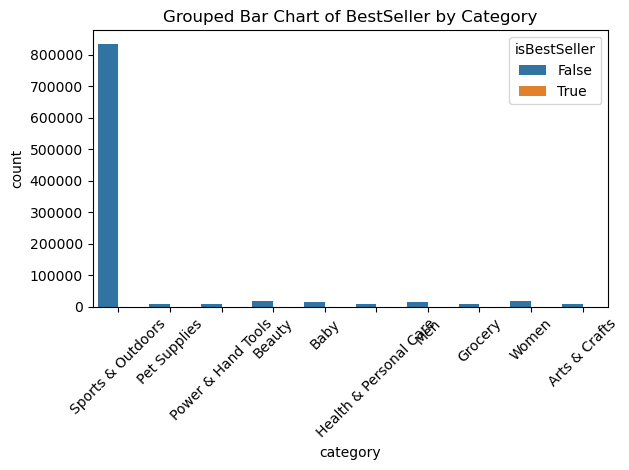

In [47]:
# Step 1: Filter for BestSellers only 
df_best = df[df["isBestSeller"] == True]

# Step 2: Count BestSellers per category
top_categories = df_best["category"].value_counts().nlargest(10).index

# Step 3: Filter full DataFrame to include only those top categories
df_top10 = df[df["category"].isin(top_categories)]

sns.countplot(data=df_top10, x="category", hue="isBestSeller")
plt.xticks(rotation=45)
plt.title("Grouped Bar Chart of BestSeller by Category")
plt.tight_layout()
plt.show()

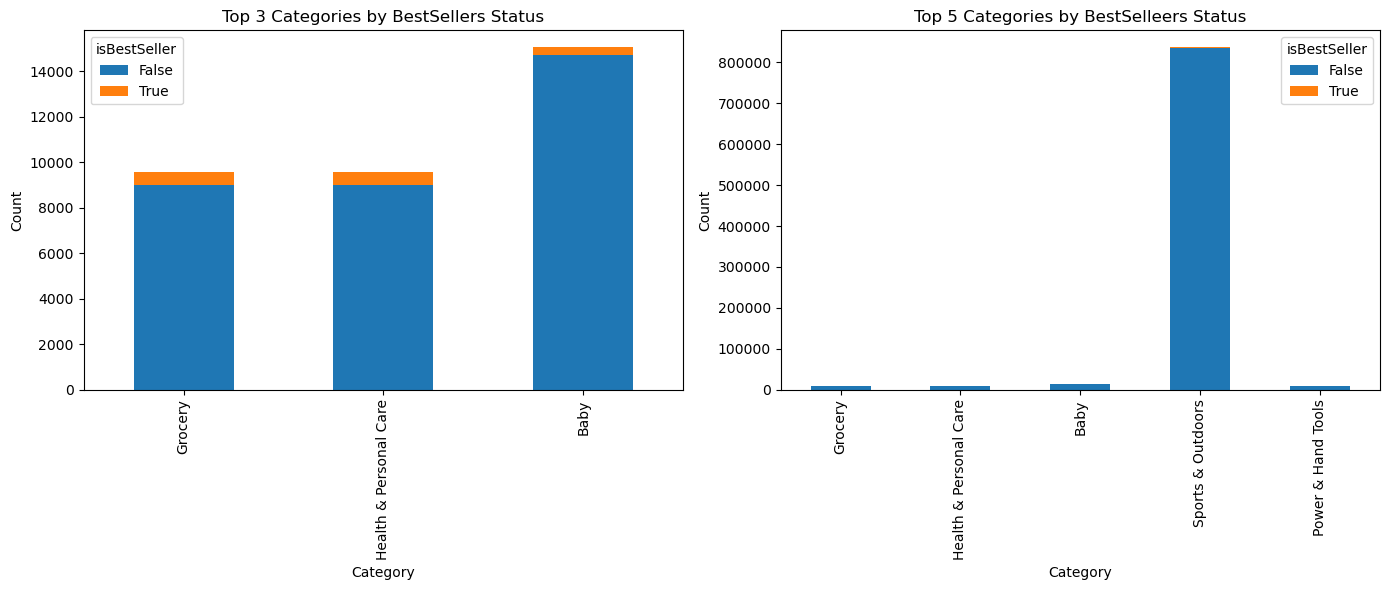

In [33]:
# Create two subplot side by side 
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # so 1 row, 2 columns 

# Plot 1: Top 3 BestSellers
df_best_sellers.head(3).plot(
    kind="bar",
    stacked=True,
    ax=axes[0]
)

axes[0].set_title("Top 3 Categories by BestSellers Status")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=90)
axes[0].legend(title="isBestSeller")

# Plot 2: Top 5 for visible outcome on stacked barplot
df_best_sellers.head(5).plot(
    kind="bar", 
    stacked=True,
    ax=axes[1])

axes[1].set_title("Top 5 Categories by BestSelleers Status")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis="x", rotation=90) # rotate x-axis labels for readability
axes[1].legend(title="isBestSeller")

plt.tight_layout() # Adjust layout to prevent clipping of labels
plt.show()

In [16]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

""
0
1
2
3
4
...
2443646
2443647
2443648
2443649


In [17]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

### Exploring Product Prices and Ratings Across Categories and Brands
Preliminary Step: Remove Outliers in Product Prices

In [49]:
# IQR Method 
# Defining 1st and 3rd quantiles 

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)

IQR = Q3-Q1

# Defining upper and lower bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df = df[(df["price"] <= upper_bound) & (df["price"] >= lower_bound)]